## Initial Data Loading 

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [41]:
df = pd.read_excel('/Users/shreyakurdukar/Desktop/AML-Group-20-Project/CTG.xls', sheet_name="Raw Data")
df.head()

FileName       Date      SegFile      b       e    LBE     LB   AC  \
0           NaN        NaT          NaN    NaN     NaN    NaN    NaN  NaN   
1  Variab10.txt 1996-12-01  CTG0001.txt  240.0   357.0  120.0  120.0  0.0   
2    Fmcs_1.txt 1996-05-03  CTG0002.txt    5.0   632.0  132.0  132.0  4.0   
3    Fmcs_1.txt 1996-05-03  CTG0003.txt  177.0   779.0  133.0  133.0  2.0   
4    Fmcs_1.txt 1996-05-03  CTG0004.txt  411.0  1192.0  134.0  134.0  2.0   

    FM   UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN    NaN  NaN  
1  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
2  0.0  4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3  0.0  5.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4  0.0  6.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  

[5 rows x 40 columns]

In [42]:
print(df.columns)

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')


In [43]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 2130
Number of Columns: 40


## Initial Data Cleaning

In [44]:
#Dropping columns with no features
df = df.drop(columns=['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'DR', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP'])

In [45]:
df = df.drop(index=0) #drops first row, since it's all nulls anyways

col_missing = df.isnull().sum()
total_missing = df.isnull().sum().sum()
print("Missing Per Column:\n" , col_missing)
print("Total Missing: ", total_missing)

Missing Per Column:
 LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
CLASS       3
NSP         3
dtype: int64
Total Missing:  57


Since there are not that many missing fields for each feature/column relative to the 2130 entries, I just removed the rows that contain null values

In [46]:
df_nonulls = df.dropna()

print("Number of Rows:", df_nonulls.shape[0])
print("Number of Columns:", df_nonulls.shape[1])

Number of Rows: 2126
Number of Columns: 23


## Class Distributions

CLASS
2.0     579
1.0     384
6.0     332
7.0     252
10.0    197
8.0     107
4.0      81
5.0      72
9.0      69
3.0      53
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of FHR Class Codes')

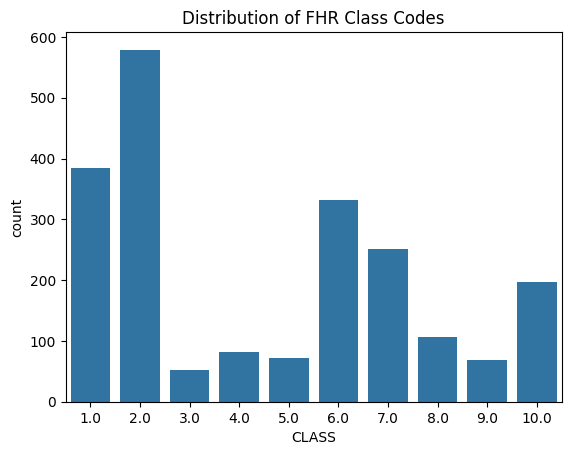

In [47]:
class_counts = df_nonulls["CLASS"].value_counts()
print(class_counts)

plt = sns.countplot(df_nonulls, x='CLASS')
plt.set_title("Distribution of FHR Class Codes")

NSP
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of NSP Classes')

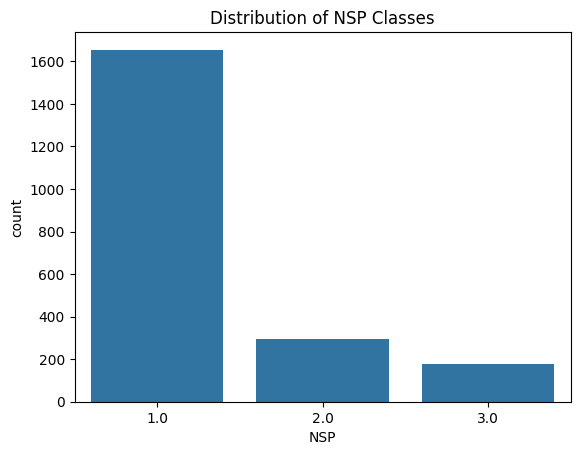

In [53]:
nsp_counts = df_nonulls["NSP"].value_counts()
print(nsp_counts)

plt2 = sns.countplot(df_nonulls, x='NSP')
plt2.set_title("Distribution of NSP Classes")

Both classes are relative imbalanced with certain classes having significantly more values than others.

## Relationships between Variables

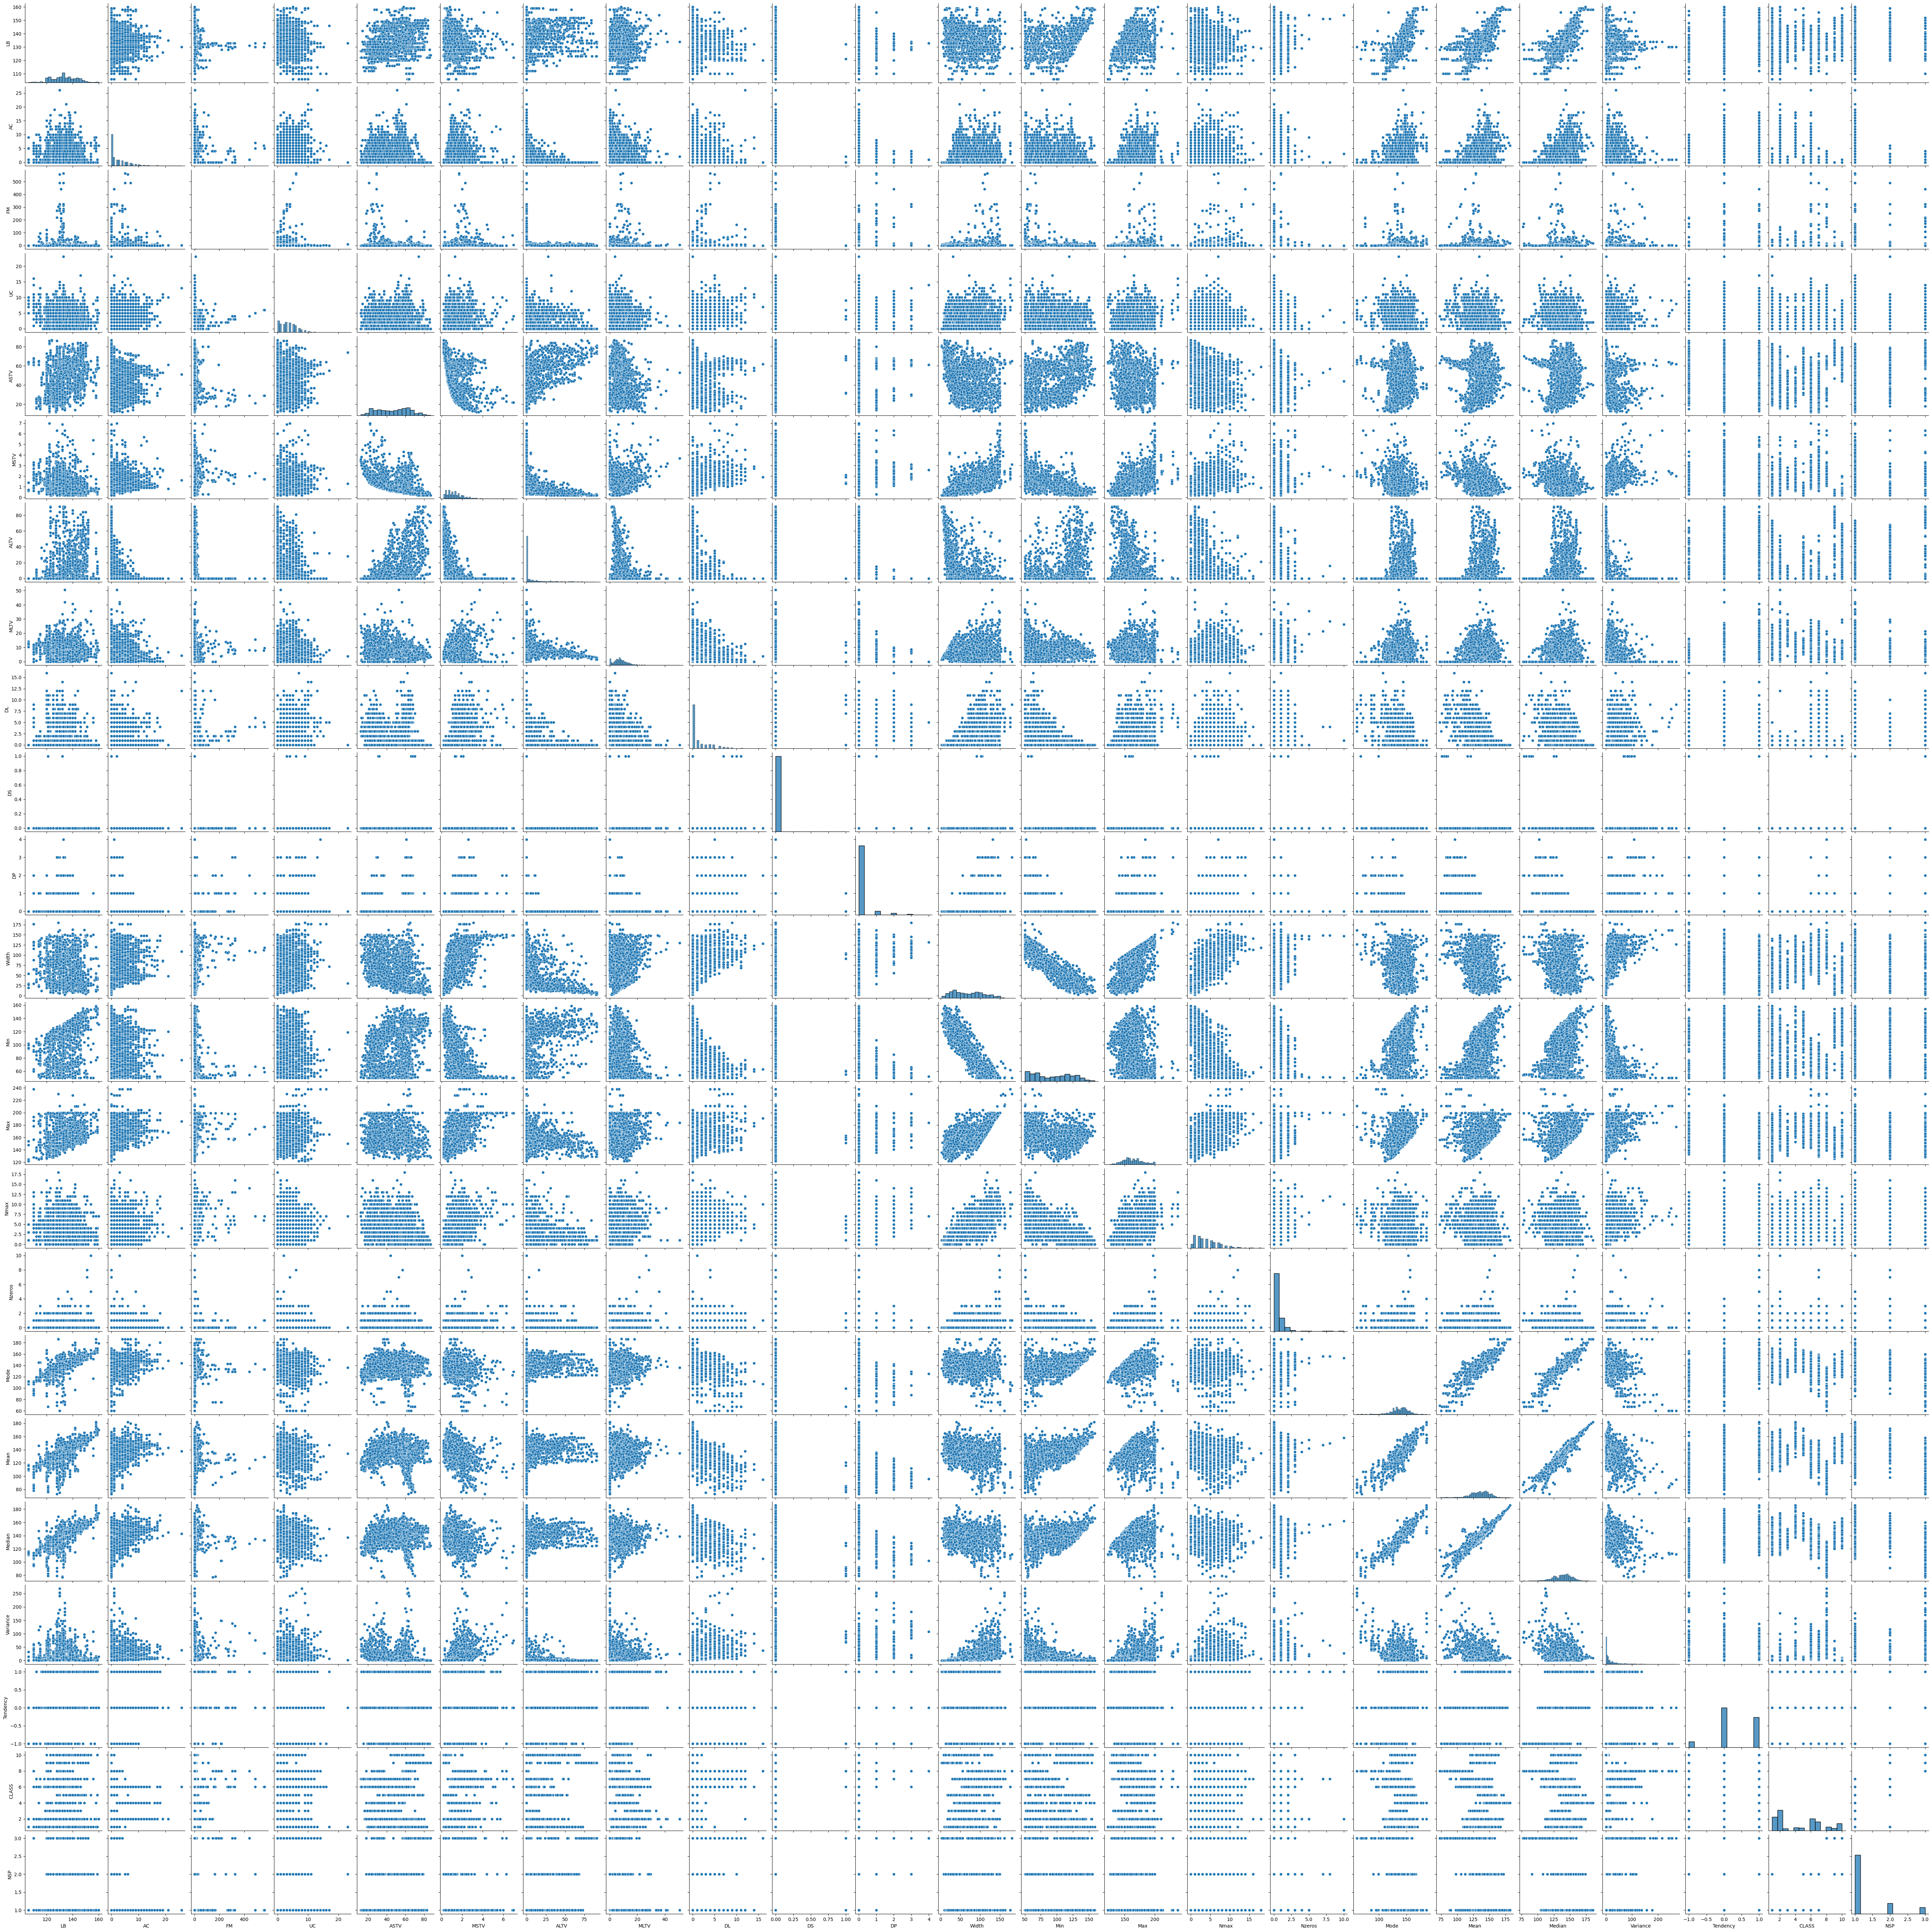

In [54]:
sns.pairplot(df_nonulls)

Looking at the pairplot above, I can see positive correlations between the measures of central tendency such as mean, median, and mode. I see stronger negative correlations between min and width. 

Text(0.5, 1.0, 'Correlation Matrix Comparing Features')

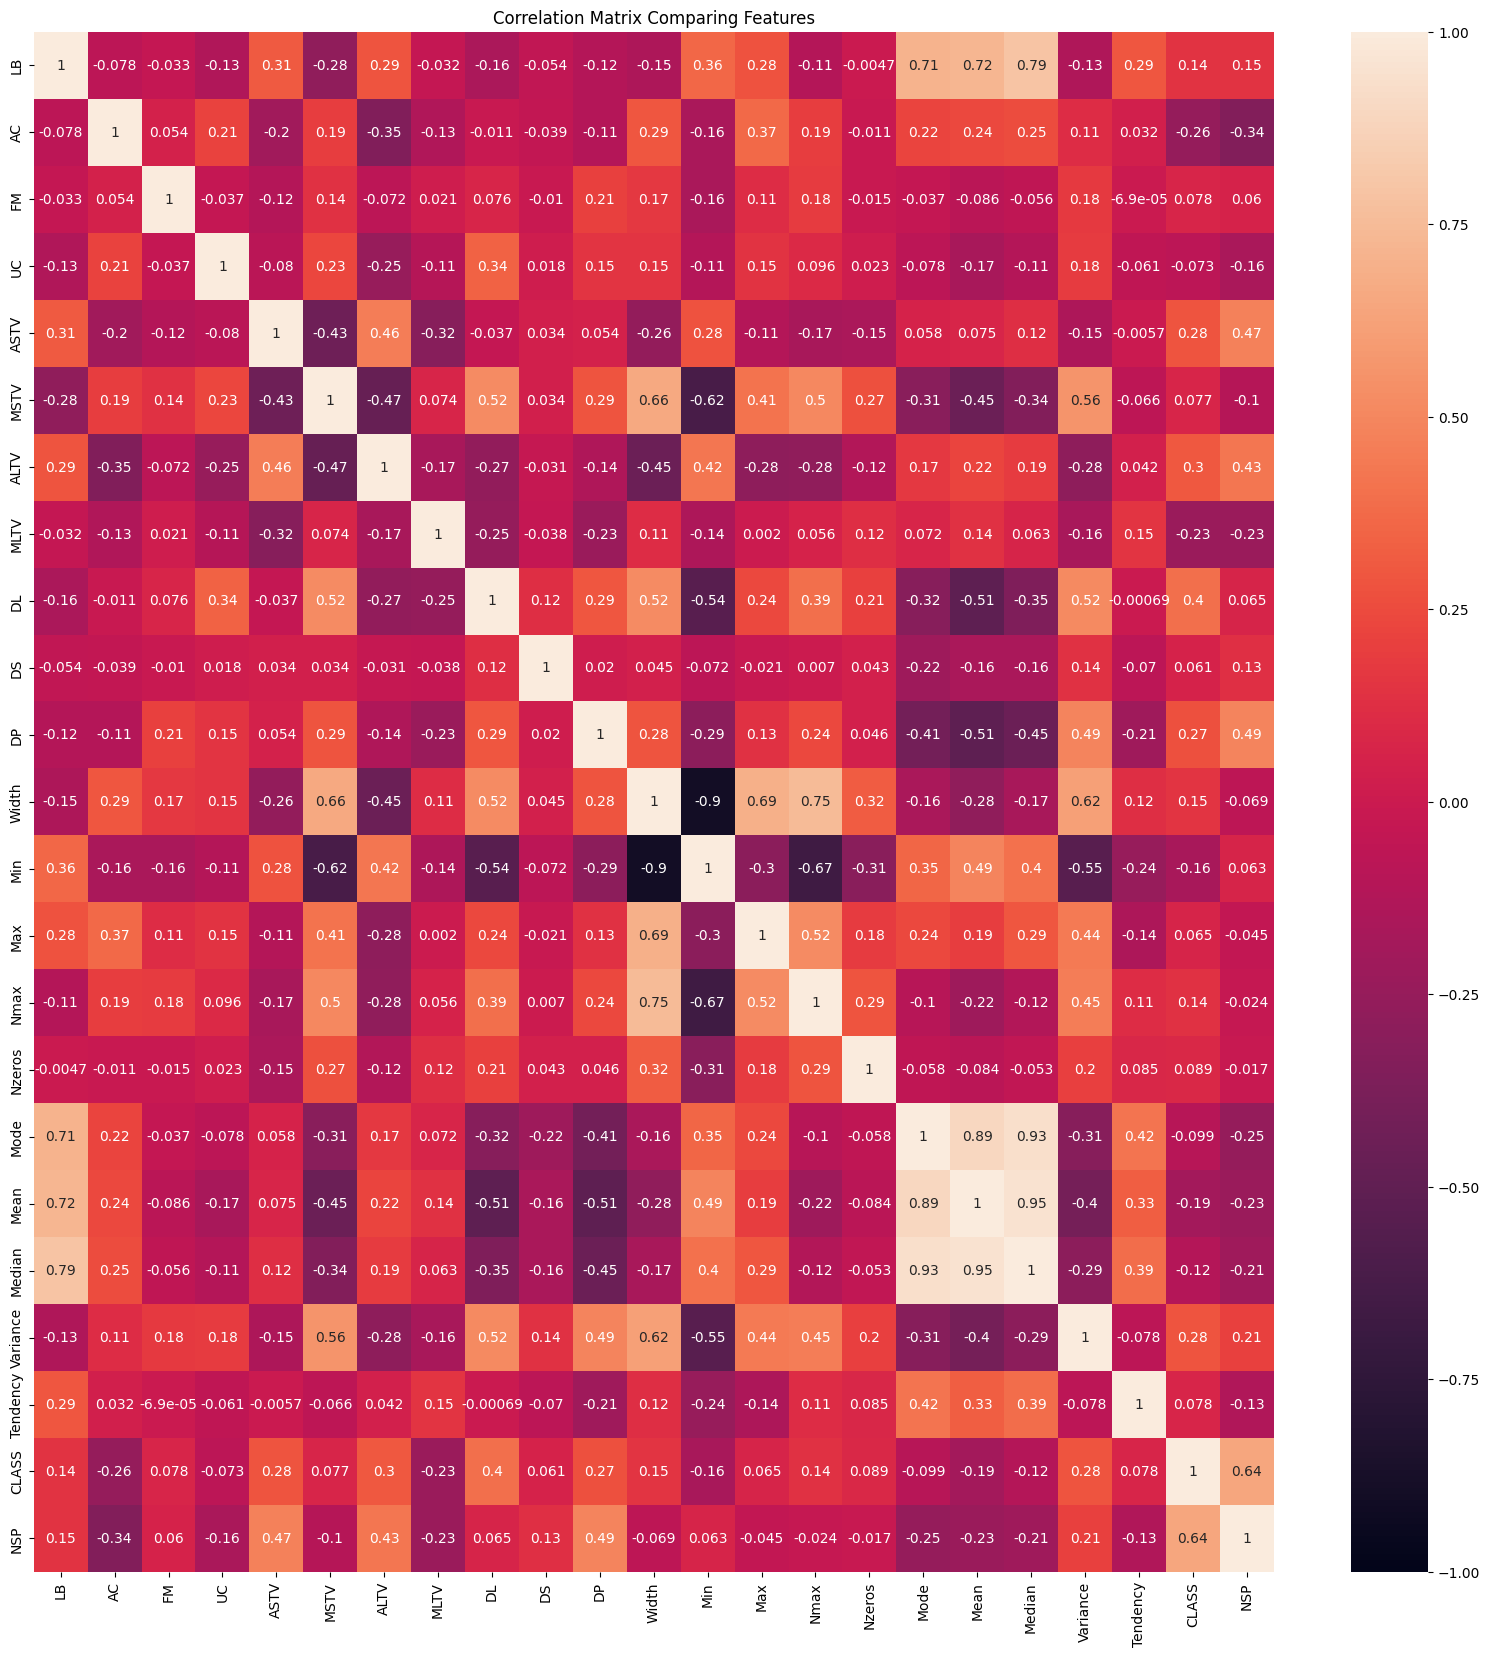

In [63]:
import matplotlib.pyplot as plt

df_corr = df_nonulls.corr()

plt.figure(figsize=(20,20))
plt1 = sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)
plt1.set_title("Correlation Matrix Comparing Features")